In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [3]:
# Load dataset
file_path = 'D:\Tugas Akhir\Stroke\hasil_setelah_normalisasi.csv'
df = pd.read_csv(file_path)

# Pisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [4]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3685,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3686,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3687,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


In [5]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df['stroke'].value_counts()
# Tampilkan output
print("Frekuensi nilai unik dalam kolom 'stroke':")
print(stroke_counts)

Frekuensi nilai unik dalam kolom 'stroke':
stroke
0    3481
1     208
Name: count, dtype: int64


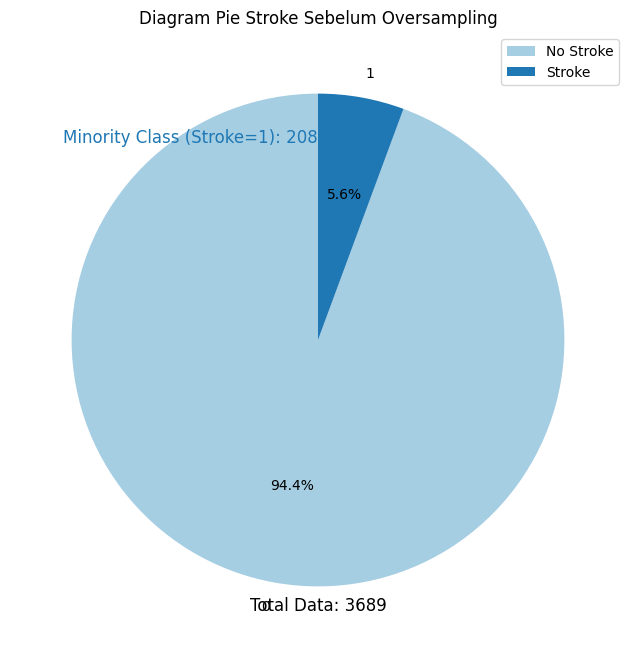

In [6]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))

# Tambahkan warna untuk setiap sektor pada diagram pie
colors = plt.cm.Paired.colors

# Plot diagram pie
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Tambahkan keterangan total data
total_data = len(df['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='center')

# Tambahkan penanda untuk kelas minoritas
minority_class_count = stroke_counts[1]  # Ambil frekuensi kelas minoritas
plt.text(0, 0.8, f'Minority Class (Stroke=1): {minority_class_count}', fontsize=12, ha='right', color=colors[1])

# Tambahkan legenda dengan posisi yang lebih baik
plt.legend(labels=['No Stroke', 'Stroke'], loc='upper right')

# Berikan judul
plt.title('Diagram Pie Stroke Sebelum Oversampling')

# Tampilkan diagram
plt.show()


In [7]:
# Langkah 1: Pilih sampel minoritas
minority_class = X[y == 1]

# Tampilkan jumlah sampel minoritas
print("Jumlah Sampel Minoritas (Stroke=1):", len(minority_class))


Jumlah Sampel Minoritas (Stroke=1): 208


In [8]:
print(df.dtypes)

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
work_type_Govt_job                  int64
work_type_Private                   int64
work_type_Self-employed             int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
smoking_status_Unknown              int64
smoking_status_formerly smoked      int64
smoking_status_never smoked         int64
smoking_status_smokes               int64
stroke                              int64
dtype: object


Hasil Perhitungan Jarak:
Distances:
[[0.         0.10121472]
 [0.         1.00989533]
 [0.         0.2793351 ]
 ...
 [0.36868267 0.7381735 ]
 [0.25563282 0.27956675]
 [0.26054063 1.05976596]]
Indices:
[[  0 126]
 [  1  42]
 [  2 132]
 ...
 [129 165]
 [202 151]
 [ 87 172]]


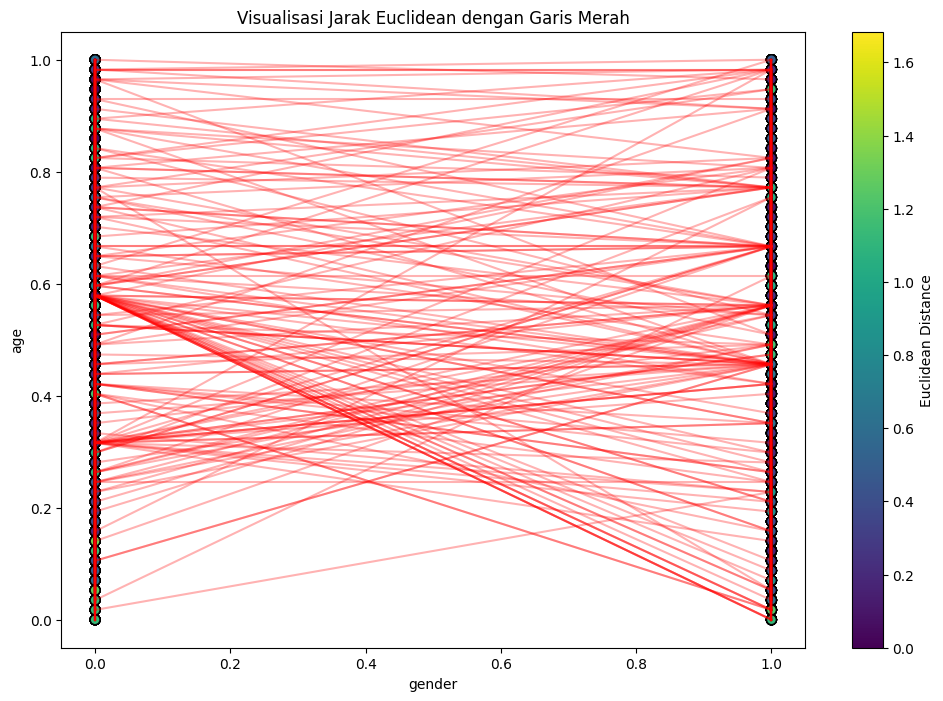

In [9]:
from sklearn.neighbors import NearestNeighbors

# Langkah 2: Hitung Jarak
nn = NearestNeighbors(n_neighbors=2, metric='euclidean')
nn.fit(minority_class)
distances, indices = nn.kneighbors(X)

# Tampilkan hasil perhitungan jarak
print("Hasil Perhitungan Jarak:")
print("Distances:")
print(distances)
print("Indices:")
print(indices)

import matplotlib.pyplot as plt

# Visualisasi Scatter Plot dengan Garis
plt.figure(figsize=(12, 8))

# Scatter plot dengan warna marker berdasarkan jarak
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=distances[:, 0], cmap='viridis', edgecolors='k', s=50)

# Menambahkan garis merah yang menghubungkan setiap sampel dengan dua tetangganya
for i in range(len(X)):
    plt.plot([X.iloc[i, 0], X.iloc[indices[i, 0], 0]], [X.iloc[i, 1], X.iloc[indices[i, 0], 1]], 'r-', alpha=0.3)

# Menambahkan colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Euclidean Distance')

# Menambahkan label dan judul
plt.xlabel(X.columns[0])  # Nama kolom fitur 1
plt.ylabel(X.columns[1])  # Nama kolom fitur 2
plt.title('Visualisasi Jarak Euclidean dengan Garis Merah')

# Tampilkan diagram
plt.show()


In [10]:
# Langkah 3: Hitung Rasio
ratio = len(X[y == 0]) / len(minority_class)
print("Rasio antara kelas mayoritas dan kelas minoritas:", ratio)


Rasio antara kelas mayoritas dan kelas minoritas: 16.735576923076923


In [11]:
# # Langkah 4: Hitung Rasio ADASYN
# desired_ratio = 0.4  # Set sesuai dengan target Anda (30-40%)
# raw_adasyn_ratio = min((desired_ratio / ratio, 1.0))  # Hitung rasio sebelum dikurangi 0.01
# adasyn_ratio = max(raw_adasyn_ratio - 0.01, 1.0)  # Sesuaikan dengan rasio yang diinginkan
# print("Jumlah Sampel Minoritas :", len(minority_class))
# print("Desired Ratio (Rasio yang diinginkan):", desired_ratio)
# print("ADASYN Ratio (Rasio yang digunakan untuk ADASYN):", adasyn_ratio)

# Langkah 4: Hitung Rasio ADASYN
desired_ratio = 0.65  
raw_adasyn_ratio = min((desired_ratio / ratio, 1.0))  
adasyn_ratio = max(raw_adasyn_ratio - 0.01, 0.65)  
print("Jumlah Sampel Minoritas :", len(minority_class))
print("Desired Ratio (Rasio yang diinginkan):", desired_ratio)
print("ADASYN Ratio (Rasio yang digunakan untuk ADASYN):", adasyn_ratio)

Jumlah Sampel Minoritas : 208
Desired Ratio (Rasio yang diinginkan): 0.65
ADASYN Ratio (Rasio yang digunakan untuk ADASYN): 0.65


In [12]:
# # Langkah 5: Hitung Weight
# weights = distances[:, 1] * (1 + adasyn_ratio)  # Sesuaikan dengan rasio yang diinginkan
# print("Weight", weights)
# # Buat histogram dari weights
# plt.hist(weights, bins=20, color='blue', edgecolor='black')

# # Atur label dan judul
# plt.xlabel('Weight')
# plt.ylabel('Frequency')
# plt.title('Distribution of Weights in ADASYN')

# # Tampilkan plot
# plt.show()

In [13]:
# Langkah 5: Buat Sampel Sintetis (solusi alternatif)
# Tampilkan jumlah sampel minoritas sebelum oversampling
print("Jumlah Sampel Minoritas Sebelum Oversampling (Stroke=1):", len(y[y == 1]))

# Oversampling menggunakan ADASYN tanpa batasan
adasyn = ADASYN(sampling_strategy=adasyn_ratio, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Tampilkan jumlah sampel minoritas setelah oversampling
print("Jumlah Sampel Minoritas Setelah Oversampling (Stroke=1):", sum(y_resampled == 1))

Jumlah Sampel Minoritas Sebelum Oversampling (Stroke=1): 208
Jumlah Sampel Minoritas Setelah Oversampling (Stroke=1): 2290


In [14]:
# Langkah 7: Gabungkan Sampel Sintetis dengan Dataset Asli
oversampled_data = pd.DataFrame(X_resampled, columns=X.columns)
oversampled_labels = pd.Series(y_resampled, name='stroke')

# Verifikasi jumlah sampel setelah oversampling
jumlah_sampel_data_asli = len(X)
jumlah_sampel_sintetis = len(X_resampled) - len(X)
jumlah_sampel_setelah_oversampling = len(oversampled_data)

print("Jumlah Sampel Data Asli:", jumlah_sampel_data_asli)
print("Jumlah Sampel Sintetis:", jumlah_sampel_sintetis)
print("Jumlah Sampel Setelah Oversampling:", jumlah_sampel_setelah_oversampling)


Jumlah Sampel Data Asli: 3689
Jumlah Sampel Sintetis: 2082
Jumlah Sampel Setelah Oversampling: 5771


In [15]:
oversampled_data

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0.736800,0,1,1,0,1,0,0,0.801200,0.522700,0,1,0,0
1,0,0.964900,0,1,1,0,1,0,1,0.234200,0.438000,0,0,1,0
2,1,0.421100,0,0,1,0,1,0,0,0.535800,0.477300,0,0,0,1
3,1,0.947400,1,0,1,0,0,1,1,0.549100,0.262400,0,0,1,0
4,0,0.982500,0,0,1,0,1,0,0,0.605000,0.365700,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,1,0.880409,0,0,1,0,1,0,1,0.631082,0.307279,1,0,0,0
5767,0,0.858301,0,0,1,0,1,0,1,0.140335,0.254772,1,0,0,0
5768,1,0.929800,0,0,1,0,1,0,0,0.090441,0.190357,1,0,0,0
5769,1,0.900879,0,0,1,0,1,0,1,0.209695,0.238608,1,0,0,0


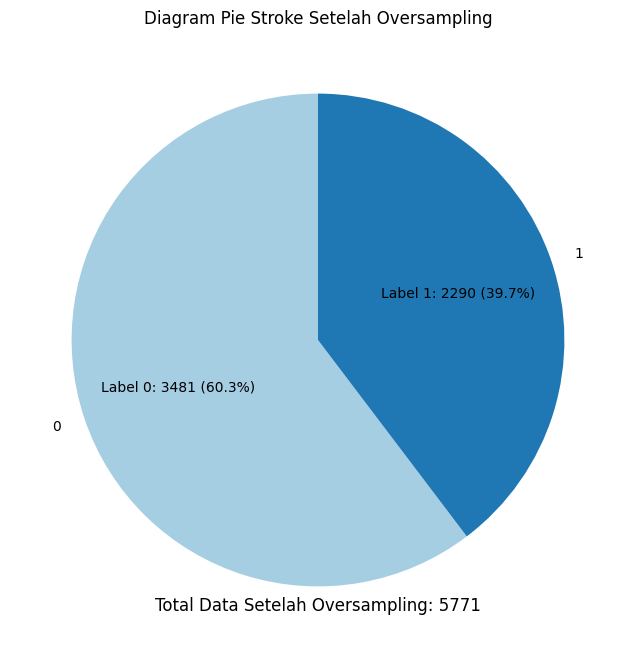

In [16]:
# Hitung frekuensi nilai unik dalam kolom 'stroke' setelah oversampling
oversampled_stroke_counts = oversampled_labels.value_counts()

# Plotting diagram pie untuk kolom 'stroke' setelah oversampling
plt.figure(figsize=(8, 8))
pie_chart, _, autotexts = plt.pie(oversampled_stroke_counts, labels=oversampled_stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, textprops=dict(color="black"))

# Tambahkan keterangan total data setelah oversampling
total_data_oversampled = len(oversampled_labels)
plt.text(0, -1.1, f'Total Data Setelah Oversampling: {total_data_oversampled}', fontsize=12, ha='center')

# Tambahkan keterangan jumlah data pada label 0 pada legenda
label_0_count = oversampled_stroke_counts[0]
autotexts[0].set_text(f'Label 0: {label_0_count} ({oversampled_stroke_counts[0]/total_data_oversampled*100:.1f}%)')

# Tambahkan keterangan jumlah data pada label 1 pada legenda
label_1_count = oversampled_stroke_counts[1]
autotexts[1].set_text(f'Label 1: {label_1_count} ({oversampled_stroke_counts[1]/total_data_oversampled*100:.1f}%)')

# Berikan judul
plt.title('Diagram Pie Stroke Setelah Oversampling')

# Tampilkan diagram setelah oversampling
plt.show()


In [17]:
# Hitung jumlah data pada stroke 0 dan stroke 1 setelah oversampling
jumlah_data_stroke_0 = oversampled_labels.value_counts()[0]
jumlah_data_stroke_1 = oversampled_labels.value_counts()[1]

# Tampilkan jumlah data pada stroke 0 dan stroke 1
print("Jumlah Data Stroke 0 Setelah Oversampling:", jumlah_data_stroke_0)
print("Jumlah Data Stroke 1 Setelah Oversampling:", jumlah_data_stroke_1)

Jumlah Data Stroke 0 Setelah Oversampling: 3481
Jumlah Data Stroke 1 Setelah Oversampling: 2290


In [18]:
import shutil

# Langkah 8: Gabungkan DataFrame fitur dan label target
oversampled_data_with_labels = pd.concat([oversampled_data, oversampled_labels], axis=1)

# Langkah 9: Simpan DataFrame ke dalam file CSV dengan label target
output_file_path = 'D:\\Tugas Akhir\\Stroke\\data_oversampled.csv'
oversampled_data_with_labels.to_csv(output_file_path, index=False, decimal=',')

# Langkah 10: Konfirmasi penyimpanan
print(f"DataFrame setelah oversampling telah disimpan di: {output_file_path}")

# (Opsional) Langkah 11: Pindahkan file ke lokasi yang diinginkan
destination_path = 'D:\\Tugas Akhir\\Stroke\\data_oversampled.csv'
shutil.move(output_file_path, destination_path)

# Konfirmasi pemindahan
print(f"File telah dipindahkan ke: {destination_path}")


DataFrame setelah oversampling telah disimpan di: D:\Tugas Akhir\Stroke\data_oversampled.csv
File telah dipindahkan ke: D:\Tugas Akhir\Stroke\data_oversampled.csv


In [19]:
oversampled_data_with_labels

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.736800,0,1,1,0,1,0,0,0.801200,0.522700,0,1,0,0,1
1,0,0.964900,0,1,1,0,1,0,1,0.234200,0.438000,0,0,1,0,1
2,1,0.421100,0,0,1,0,1,0,0,0.535800,0.477300,0,0,0,1,1
3,1,0.947400,1,0,1,0,0,1,1,0.549100,0.262400,0,0,1,0,1
4,0,0.982500,0,0,1,0,1,0,0,0.605000,0.365700,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,1,0.880409,0,0,1,0,1,0,1,0.631082,0.307279,1,0,0,0,1
5767,0,0.858301,0,0,1,0,1,0,1,0.140335,0.254772,1,0,0,0,1
5768,1,0.929800,0,0,1,0,1,0,0,0.090441,0.190357,1,0,0,0,1
5769,1,0.900879,0,0,1,0,1,0,1,0.209695,0.238608,1,0,0,0,1


<Axes: >

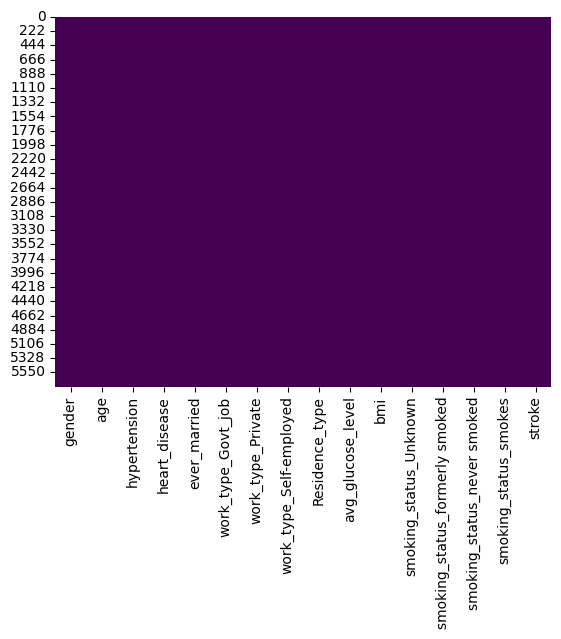

In [20]:
import seaborn as sns
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(oversampled_data_with_labels.isnull(), cbar=False, cmap='viridis')